In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Load your data
os.chdir(r"C:\Users\Sahana Dhandapani\OneDrive\Documents")
data = pd.read_excel("coded responses.xlsx")
print(data.columns.tolist())




['Unnamed: 0', 'Unnamed: 1', 'Department', 'Team', 'Position ', 'Working condition', 'T.Working condition', 'C.Leadership', 'E.Leadership', 'career development', 'co-workers', 'Training', 'Learning', 'problem solving', 'Learning&dev', '  conflicts ', 'd.individual contribution', 'd.target completion   ', 'd.quality of work ', 'd.engagement&motivation ']


In [4]:
# Step 2: Define the survey columns to include in clustering
features = ['Working condition', 'T.Working condition', 'C.Leadership', 'E.Leadership', 
            'career development', 'co-workers', 'Training', 'Learning', 'problem solving', 'Learning&dev',
            '  conflicts ', 'd.individual contribution', 'd.target completion   ', 'd.quality of work ', 'd.engagement&motivation ']

X = data[features]


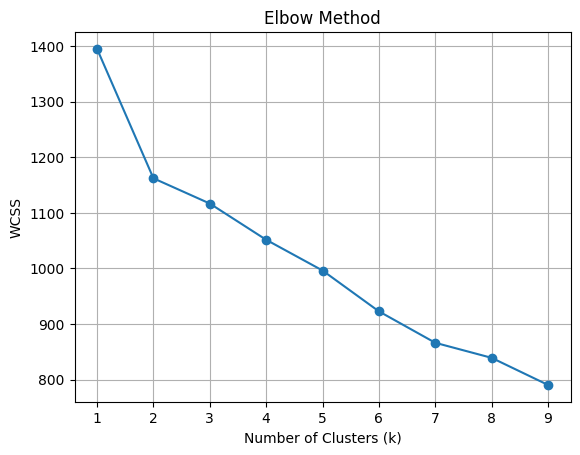

         Working condition  T.Working condition  C.Leadership  E.Leadership  \
Cluster                                                                       
0                 3.277778             3.444444      3.277778      3.444444   
1                 3.924242             3.727273      3.803030      3.939394   
2                 3.666667             3.666667      3.444444      3.777778   

         career development  co-workers  Training  Learning  problem solving  \
Cluster                                                                        
0                  3.277778    3.722222  3.444444  3.611111         3.333333   
1                  3.924242    3.924242  3.954545  3.863636         3.924242   
2                  3.444444    3.666667  3.888889  3.444444         3.444444   

         Learning&dev    conflicts   d.individual contribution  \
Cluster                                                          
0            3.555556      3.555556                   3.500000   
1    

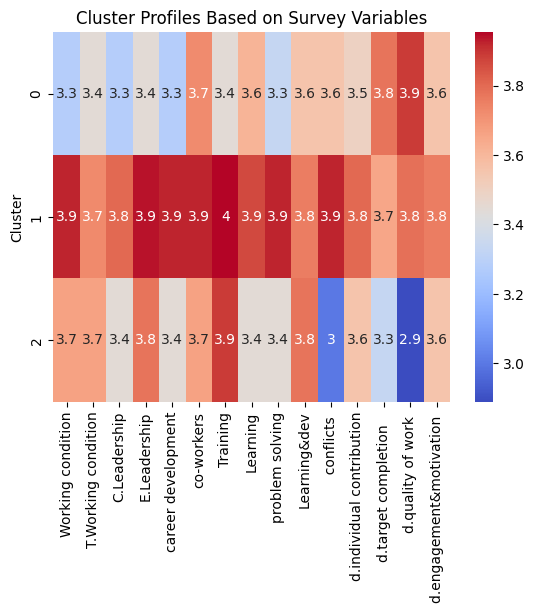

In [5]:
# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Use the Elbow Method to find the optimal number of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Step 5: Plot the Elbow curve
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 6: Fit K-Means with chosen k (example: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Analyze the clusters
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)

# Step 8: Visualize cluster profiles with heatmap
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title('Cluster Profiles Based on Survey Variables')
plt.show()